# 🚢🛳 Titanic Prediction 🛳🚢

# PART 00

# Step1: Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Step2: Read Datasets

In [2]:
df = pd.read_csv('/Titanic.csv')

# Step3: Check out the Data

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#describing for categorical features 
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


# Step4: Data preparation 
<hr>
<h2>Dealing with Missing Data

In [68]:
# finding nan values
per_nan = 100*(df.isnull().sum()/len(df))
per_nan

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [69]:
# Removing Cabin column
df_new = df.drop('Cabin',axis=1)

In [70]:
per_nan = 100*(df_new.isnull().sum()/len(df_new))
per_nan

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Embarked        0.224467
dtype: float64

In [71]:
#Finding Nan Value in Embarked column & Removing rows 
df_new = df_new.dropna(axis=0,subset=['Embarked'])
df_new['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [72]:
per_nan = 100*(df_new.isnull().sum()/len(df_new))
per_nan

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.910011
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Embarked        0.000000
dtype: float64

In [73]:
# NAN Values in Age Feature
df_new.loc[df_new.loc[df_new['Age'].isna(),:].index]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,S


In [74]:
from pandas.core.common import random_state
# finding random values for replacing Nan values
age_avg = df_new['Age'].mean()
age_std = df_new['Age'].std()
age_null_count = df_new['Age'].isnull().sum()
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
age_null_random_list

array([34, 18, 39, 39, 21, 40, 17, 17, 30, 15, 30, 22, 15, 23, 27, 32, 36,
       40, 34, 27, 30, 22, 23, 38, 39, 19, 19, 21, 31, 26, 21, 33, 29, 17,
       31, 23, 31, 43, 39, 43, 38, 29, 40, 42, 18, 32, 38, 16, 36, 24, 38,
       20, 39, 29, 31, 36, 40, 23, 38, 41, 38, 31, 38, 24, 21, 38, 24, 23,
       33, 18, 18, 35, 39, 17, 19, 35, 17, 19, 23, 31, 16, 31, 21, 31, 18,
       40, 19, 40, 38, 22, 23, 21, 38, 22, 24, 35, 32, 35, 27, 28, 36, 22,
       22, 41, 36, 39, 28, 19, 41, 30, 33, 21, 27, 20, 39, 33, 28, 37, 33,
       29, 16, 21, 42, 18, 19, 35, 26, 21, 24, 24, 38, 20, 20, 25, 20, 26,
       21, 41, 36, 34, 24, 33, 19, 39, 26, 38, 35, 39, 39, 32, 24, 22, 17,
       36, 21, 21, 22, 27, 28, 38, 21, 21, 31, 25, 35, 29, 23, 43, 15, 19,
       29, 29, 33, 38, 19, 21, 28])

In [75]:
#Replacing 
df_new['Age'][df_new.loc[df_new['Age'].isna(),:].index] = age_null_random_list

In [76]:
per_nan = 100*(df_new.isnull().sum()/len(df_new))
per_nan

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

#### Hint: Now, we don't have any Missing Data.

## 🟣Creating Dummy Variables

In [77]:
# removing Name & Ticket & PssengerId Features
df_new = df_new.drop(labels={'Name','Ticket','PassengerId'},axis=1)


In [78]:
#Divide the age into five categories
AgePart= pd.cut(df['Age'],5).unique().sort_values()
AgePart

[(0.34, 16.336], (16.336, 32.252], (32.252, 48.168], (48.168, 64.084], (64.084, 80.0], NaN]
Categories (5, interval[float64, right]): [(0.34, 16.336] < (16.336, 32.252] < (32.252, 48.168] <
                                           (48.168, 64.084] < (64.084, 80.0]]

In [79]:
# Mapping Age
df_new.loc[ df_new['Age'] <= 16, 'Age'] = 0
df_new.loc[(df_new['Age'] > 16) & (df_new['Age'] <= 32), 'Age'] = 1
df_new.loc[(df_new['Age'] > 32) & (df_new['Age'] <= 48), 'Age'] = 2
df_new.loc[(df_new['Age'] > 48) & (df_new['Age'] <= 64), 'Age'] = 3
df_new.loc[ df_new['Age'] > 64, 'Age'] = 4 ;

In [80]:
#Fare has an inverse correlation with Pclass
df_new.corr()['Fare'].sort_values()

Pclass     -0.548193
Age         0.111209
SibSp       0.160887
Parch       0.217532
Survived    0.255290
Fare        1.000000
Name: Fare, dtype: float64

In [81]:
# Divide the fare into three categories
FarePart= pd.cut(df['Fare'],3).unique().sort_values()
FarePart

[(-0.512, 170.776], (170.776, 341.553], (341.553, 512.329]]
Categories (3, interval[float64, right]): [(-0.512, 170.776] < (170.776, 341.553] <
                                           (341.553, 512.329]]

In [82]:
# Mapping Fare
df_new.loc[ df_new['Fare'] <= 170.776, 'Fare'] = 0
df_new.loc[(df_new['Fare'] > 170.776) & (df_new['Fare'] <= 341.553), 'Fare'] = 1
df_new.loc[(df_new['Fare'] > 341.553),'Fare'] = 2;

In [83]:
df_new['Fare'].unique()

array([0., 1., 2.])

In [84]:
#on hot encoding subject & Pclass features
Features_onhot= pd.get_dummies(df_new[['Pclass','Sex','Embarked']].astype(str),drop_first=True)
Features_onhot.head()


,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,1,1,0,1
1,0,0,0,0,0
2,0,1,0,0,1
3,0,0,0,0,1
4,0,1,1,0,1


In [86]:
# concats features
df_new=pd.concat([df_new.drop(['Pclass','Sex','Embarked'],axis=1),Features_onhot],axis=1)
df_new.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,1.0,1,0,0.0,0,1,1,0,1
1,1,2.0,1,0,0.0,0,0,0,0,0
2,1,1.0,0,0,0.0,0,1,0,0,1
3,1,2.0,1,0,0.0,0,0,0,0,1
4,0,2.0,0,0,0.0,0,1,1,0,1


# Step5: Train Test Split

In [87]:
X = df_new.drop('Survived',axis=1)
X.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,1.0,1,0,0.0,0,1,1,0,1
1,2.0,1,0,0.0,0,0,0,0,0
2,1.0,0,0,0.0,0,1,0,0,1
3,2.0,1,0,0.0,0,0,0,0,1
4,2.0,0,0,0.0,0,1,1,0,1


In [88]:
y = df_new['Survived']

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step6: Scaling Data

In [90]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [91]:
scaled_X_train= scaler.transform(X_train)
scaled_X_test= scaler.transform(X_test)

# PART 01

# Step7: Build the model ---> Logistic Regression

In [92]:
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression()
log_reg_model.fit(scaled_X_train, y_train)

LogisticRegression()

# Step8: Predict

In [93]:
y_pred_log= log_reg_model.predict(scaled_X_test)

# Step9: Evaluate model

In [94]:
from sklearn.metrics import accuracy_score,precision_score, confusion_matrix, classification_report, plot_confusion_matrix,recall_score,f1_score

## 🟣 Confusion Matrix

In [95]:
confusion_matrix(y_test,y_pred_log)

array([[135,  32],
       [ 26,  74]])

### Classification Report

In [96]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       167
           1       0.70      0.74      0.72       100

    accuracy                           0.78       267
   macro avg       0.77      0.77      0.77       267
weighted avg       0.79      0.78      0.78       267



### Plot Confusion Matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


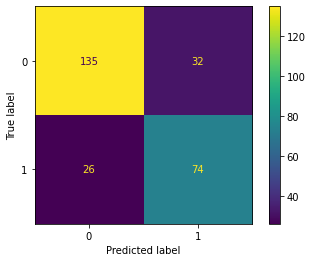

In [97]:
plot_confusion_matrix(log_reg_model, scaled_X_test, y_test)

## 🟣 Accuracy Score

In [98]:
acc_log_model=accuracy_score(y_test,y_pred_log)
acc_log_model

0.7827715355805244

## 🟣 Precision Score

In [105]:
precision_log_model=precision_score(y_test,y_pred_log)
precision_log_model

0.6981132075471698

## 🟣 Recall score

In [106]:
recall_log_model=recall_score(y_test,y_pred_log)
recall_log_model

0.74

## 🟣 F1-score

In [108]:
f1_log_model=f1_score(y_test,y_pred_log)
f1_log_model

0.7184466019417476

## 🟣 Curves & AUC

In [107]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve

### Plot Precision Recall Curve

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


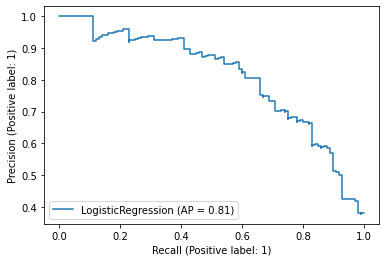

In [109]:
plot_precision_recall_curve(log_reg_model, scaled_X_test, y_test)

### Plot Roc Curve

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


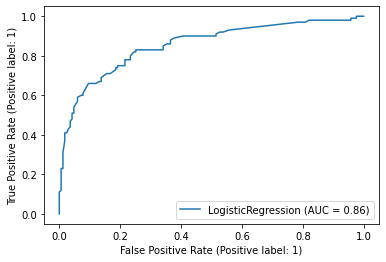

In [110]:
plot_roc_curve(log_reg_model, scaled_X_test, y_test)

# Step10: Create DataFrame From Accuracy & Precision & Recall & F1-score

In [111]:
Logestic_result=pd.DataFrame(data=[acc_log_model,precision_log_model,recall_log_model,f1_log_model],index=['Accuracy','Precision','Recall','F1-score'],columns=['Logestic'])
Logestic_result

,Logestic
Accuracy,0.782772
Precision,0.698113
Recall,0.740000
F1-score,0.718447


# PART 02

# Step11: Build the model ---> KNN

In [112]:
from sklearn.neighbors import KNeighborsClassifier

In [113]:
knn_model=KNeighborsClassifier(n_neighbors=3)

In [114]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

# Step12: Predict

In [115]:
y_pred_knn=knn_model.predict(scaled_X_test)

# Step13: Evaluate model

## 🟣 Confusion Matrix

In [116]:
confusion_matrix(y_test,y_pred_knn)

array([[139,  28],
       [ 27,  73]])

### Classification Report

In [123]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       167
           1       0.72      0.73      0.73       100

    accuracy                           0.79       267
   macro avg       0.78      0.78      0.78       267
weighted avg       0.79      0.79      0.79       267



### Plot Confusion Matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


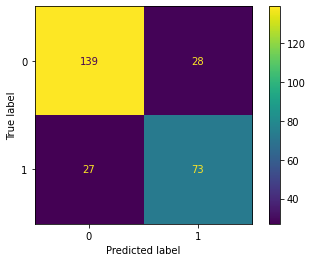

In [124]:
plot_confusion_matrix(knn_model,scaled_X_test,y_test)

## 🟣 Accuracy Score

In [125]:
acc_knn=accuracy_score(y_test,y_pred_knn)
acc_knn

0.7940074906367042

## 🟣 Precision Score

In [126]:
precision_knn=precision_score(y_test,y_pred_knn)
precision_knn

0.7227722772277227

## 🟣 Recall score

In [127]:
recall_knn=recall_score(y_test,y_pred_knn)
recall_knn

0.73

## 🟣 F1-score

In [128]:
f1_knn=f1_score(y_test,y_pred_knn)
f1_knn

0.7263681592039801

# Step14: Elbow Method for Choosing Reasonable K Values

In [129]:
error_knn=[]
for n in range(1,30):
  knn_model=KNeighborsClassifier(n_neighbors=n)
  knn_model.fit(scaled_X_train,y_train)
  y_pred_knn = knn_model.predict(scaled_X_test)
  error_knn.append(1-accuracy_score(y_test, y_pred_knn))
error_knn

[0.34082397003745324,
 0.20599250936329583,
 0.20599250936329583,
 0.20973782771535576,
 0.202247191011236,
 0.202247191011236,
 0.19850187265917607,
 0.202247191011236,
 0.19850187265917607,
 0.1910112359550562,
 0.18352059925093633,
 0.19850187265917607,
 0.19850187265917607,
 0.19475655430711614,
 0.19475655430711614,
 0.19475655430711614,
 0.19850187265917607,
 0.1910112359550562,
 0.19475655430711614,
 0.19475655430711614,
 0.18352059925093633,
 0.19850187265917607,
 0.18726591760299627,
 0.18726591760299627,
 0.202247191011236,
 0.19850187265917607,
 0.202247191011236,
 0.202247191011236,
 0.202247191011236]

### Plot

Text(0.5, 0, 'K Value')

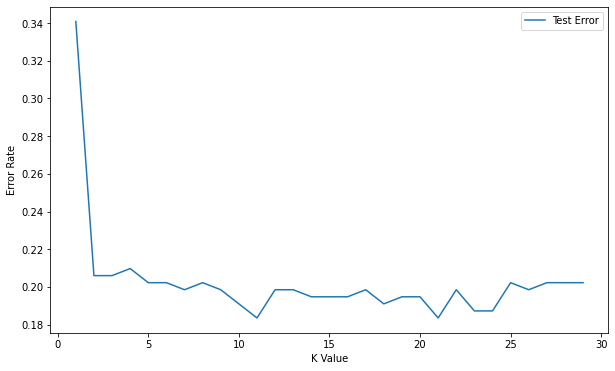

In [130]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 30), error_knn, label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel('K Value')

# Step15: Creating a Pipeline to find best K value

In [131]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [132]:
pipe_knn=Pipeline([('scaler', StandardScaler()),('knn',KNeighborsClassifier())])

In [133]:
k_values=list(range(1,20))
param_grid= {'knn__n_neighbors': k_values}
full_cv_classifier=GridSearchCV(pipe_knn,param_grid=param_grid,cv=5, scoring='accuracy')

In [134]:
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [135]:
full_cv_classifier.best_estimator_.get_params()

{'knn': KNeighborsClassifier(n_neighbors=7),
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 7,
 'knn__p': 2,
 'knn__weights': 'uniform',
 'memory': None,
 'scaler': StandardScaler(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=7))],
 'verbose': False}

# Step16: Final Model

In [136]:
scaler= StandardScaler()
knn7= KNeighborsClassifier(n_neighbors=7)
operations= [('scaler', scaler), ('knn7', knn7)]

In [137]:
pipe_knn=Pipeline(operations)


## 🟣 Fit model with the best K value

In [ ]:
pipe_knn.fit(X_train,y_train)

## 🟣 Predict

In [139]:
y_pred_knn_best=pipe_knn.predict(X_test)

## 🟣 Evaluating the Model

### Confusion Matrix

In [140]:
confusion_matrix(y_test,y_pred_knn_best)

array([[152,  15],
       [ 38,  62]])

#### Classification Report

In [141]:
print(classification_report(y_test,y_pred_knn_best))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       167
           1       0.81      0.62      0.70       100

    accuracy                           0.80       267
   macro avg       0.80      0.77      0.78       267
weighted avg       0.80      0.80      0.79       267



#### Plot Confusion Matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


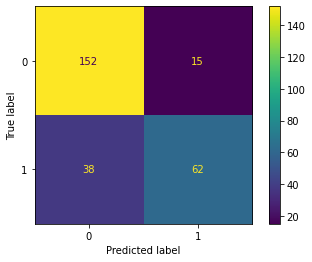

In [142]:
plot_confusion_matrix(pipe_knn,X_test,y_test)

### Acuracy

In [143]:
acc_knn_best=accuracy_score(y_test,y_pred_knn_best)
acc_knn_best

0.8014981273408239

### Precision Score

In [144]:
precision_knn_best=precision_score(y_test,y_pred_knn_best)
precision_knn_best

0.8051948051948052

### Recall score

In [145]:
recall_knn_best=recall_score(y_test,y_pred_knn_best)
recall_knn_best

0.62

### F1-score

In [146]:
f1_knn_best=f1_score(y_test,y_pred_knn_best)
f1_knn_best

0.7005649717514124

### Predict with a sample

In [147]:
X.keys()

Index(['Age', 'SibSp', 'Parch', 'Fare', 'Pclass_2', 'Pclass_3', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [149]:
smaple_test=[1,3,0,0,0,1,1,1,0]
print(pipe_knn.predict([smaple_test]))

[0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


# Step17: Create DataFrame From Accuracy & Precision & Recall & F1-score(Final Model)

In [177]:
KNN_result=pd.DataFrame(data=[acc_knn_best,precision_knn_best,recall_knn_best,f1_knn_best],index=['Accuracy','Precision','Recall','F1-score'],columns=['KNN'])
KNN_result

,KNN
Accuracy,0.801498
Precision,0.805195
Recall,0.620000
F1-score,0.700565


# PART 03

# Step18: Build the model ---> SVM

In [150]:
from sklearn.svm import SVC

In [151]:
svm_model=SVC()
svm_model.fit(scaled_X_train,y_train)

SVC()

# Step19: Predict

In [152]:
y_pred_svm=svm_model.predict(scaled_X_test)

# Step20: Evaluate model

## 🟣 Confusion Matrix

In [160]:
confusion_matrix(y_test,y_pred_svm)

array([[155,  12],
       [ 36,  64]])

### Classification Report

In [161]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       167
           1       0.84      0.64      0.73       100

    accuracy                           0.82       267
   macro avg       0.83      0.78      0.80       267
weighted avg       0.82      0.82      0.81       267



### Plot Confusion Matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


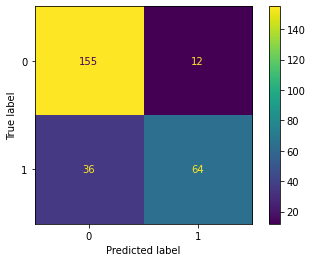

In [163]:
plot_confusion_matrix(svm_model,scaled_X_test,y_test)

## 🟣Acuracy

In [156]:
acc_svm=accuracy_score(y_test,y_pred_svm)
acc_svm

0.8202247191011236

## 🟣 Precision Score

In [157]:
precision_svm=precision_score(y_test,y_pred_svm)
precision_svm

0.8421052631578947

## 🟣 Recall score

In [158]:
recall_svm=recall_score(y_test,y_pred_svm)
recall_svm

0.64

## 🟣 F1-score

In [159]:
f1_svm=f1_score(y_test,y_pred_svm)
f1_svm

0.7272727272727272

# Step21: Final Model
<hr>
<h1> Hyperparameters
<h4> Choosing the best hyperparameters through GridSearchCV

In [164]:
svm_final=SVC()
param_grid = {'C':[0.01,0.1,1, 10, 100],'gamma':[1, 0.1, 0.01, 0.001,'scale'],'degree':[2,3,4],'kernel':['linear','rbf','poly']}
grid = GridSearchCV(svm_final,param_grid, cv=10,scoring='accuracy')

## 🟣 Fit model with the best hyperparameters

In [165]:
grid.fit(scaled_X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'degree': [2, 3, 4],
                         'gamma': [1, 0.1, 0.01, 0.001, 'scale'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [166]:
grid.best_params_

{'C': 10, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'}

## 🟣 Predict

In [167]:
y_pred_svm_best=grid.predict(scaled_X_test)

## 🟣 Evaluating the Model

### Confusion Matrix

In [168]:
confusion_matrix(y_test,y_pred_svm_best)

array([[148,  19],
       [ 35,  65]])

#### Classification Report

In [169]:
print(classification_report(y_test,y_pred_svm_best))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       167
           1       0.77      0.65      0.71       100

    accuracy                           0.80       267
   macro avg       0.79      0.77      0.78       267
weighted avg       0.80      0.80      0.79       267



#### Plot Confusion Matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


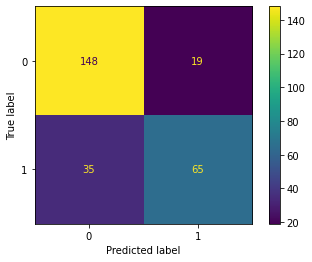

In [170]:
plot_confusion_matrix(grid,scaled_X_test,y_test)

### Acuracy

In [171]:
acc_svm_final=accuracy_score(y_test,y_pred_svm_best)
acc_svm_final

0.797752808988764

### Precision Score

In [172]:
precision_svm_final=precision_score(y_test,y_pred_svm_best)
precision_svm_final

0.7738095238095238

### Recall score

In [173]:
recall_svm_final=recall_score(y_test,y_pred_svm_best)
recall_svm_final

0.65

### F1-score

In [174]:
f1_svm_final=f1_score(y_test,y_pred_svm_best)
f1_svm_final

0.7065217391304347

# Step22: Create DataFrame From Accuracy & Precision & Recall & F1-score(Final Model)

In [178]:
SVM_result=pd.DataFrame(data=[acc_svm,precision_svm,recall_svm,f1_svm],index=['Accuracy','Precision','Recall','F1-score'],columns=['SVM'])
SVM_result

,SVM
Accuracy,0.820225
Precision,0.842105
Recall,0.640000
F1-score,0.727273


# Step23: Create DataFrame From Accuracy & Precision & Recall & F1-score
<hr>
<h3>Concanate All Models dataframes (Step10, Step17, Step22)

In [179]:
pd.concat([Logestic_result,KNN_result,SVM_result],axis=1)

,Logestic,KNN,SVM
Accuracy,0.782772,0.801498,0.820225
Precision,0.698113,0.805195,0.842105
Recall,0.740000,0.620000,0.640000
F1-score,0.718447,0.700565,0.727273
